<a href="https://colab.research.google.com/github/matthog/MLProject/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving output.json to output (8).json
Mean Squared Error (MSE): 37441920.62957313
R^2 Score: -0.39346667270614133
Coefficients: [ 152.37585033 1168.33729323 1664.38137761 -122.03508018  282.48379798]
Intercept: 13181.97578148922

Sample of Predicted vs Actual Values:
Actual: 9460.00, Predicted: 16093.90
Actual: 14174.09, Predicted: 13179.43
Actual: 4412.69, Predicted: 11398.33
Actual: 8061.75, Predicted: 12012.26
Actual: 4260.00, Predicted: 13675.40


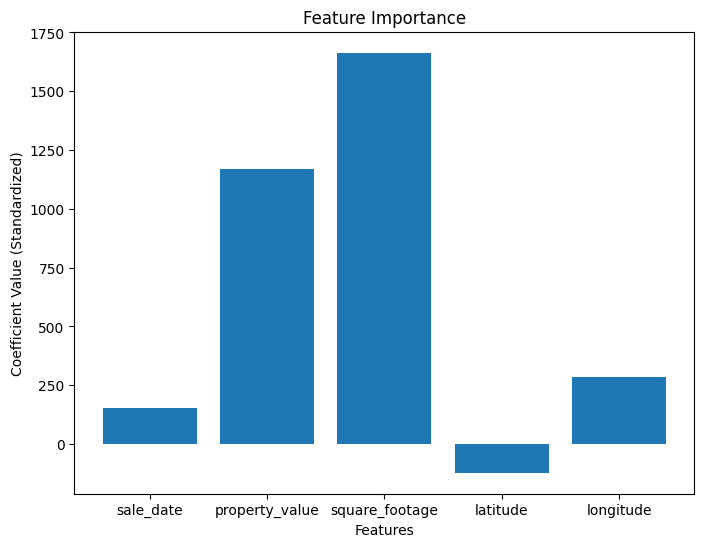

<ipython-input-9-7b2136a96faf>:96: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


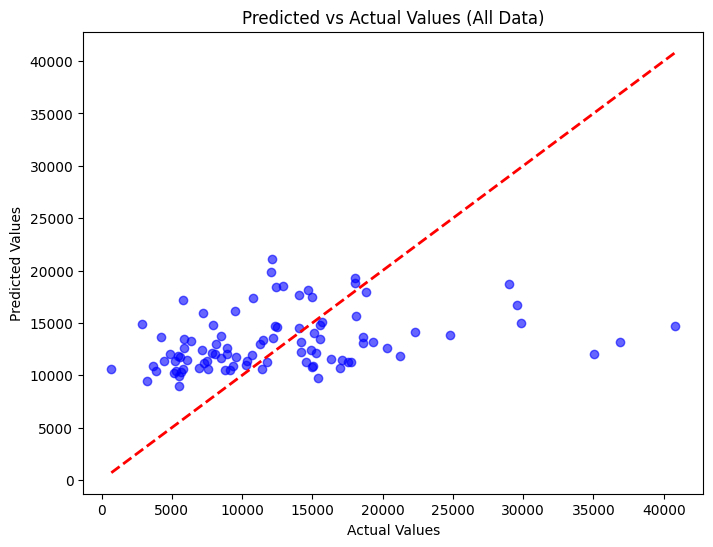

,sale_date,property_value,square_footage,latitude,longitude,total_sales
0,8,488200.0,2844.0,35.760377,-81.362946,14174.09
1,12,425100.0,3085.0,35.751089,-81.360760,5831.75
2,3,297700.0,1642.0,35.767706,-81.335343,5829.89
3,9,934600.0,4606.0,35.733797,-81.175612,14944.08
4,9,582600.0,5675.0,35.728856,-81.779795,5769.00


In [ ]:

import json
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
with open(file_name, 'r') as file:
    data = json.load(file)

# Extract relevant fields into a DataFrame
records = []
for key, value in data.items():
    record = {
        "sale_date": value["sale_date"],
        "property_value": float(value["property_value"]),
        "square_footage": float(value["square_footage"]),
        "latitude": value["coordinates"]["latitude"],
        "longitude": value["coordinates"]["longitude"],
        "total_sales": value["csv_data"]["total_sales"]
    }
    records.append(record)

# Create  DataFrame
df = pd.DataFrame(records)


# Convert `sale_date` to numerical (month index)
month_mapping = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5,
    "June": 6, "July": 7, "August": 8, "September": 9, "October": 10,
    "November": 11, "December": 12
}
df["sale_date"] = df["sale_date"].map(month_mapping)

# Define features and target
X = df[["sale_date", "property_value", "square_footage", "latitude", "longitude"]]
y = df["total_sales"]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training and Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict data
y_pred_test = model.predict(X_test)

# Predict data
y_pred_all = model.predict(X_scaled)

mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print
print("Mean Squared Error (MSE):", mse)
print("R^2 Score:", r2)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Display a random test sample
sample_indices = random.sample(range(len(y_test)), 5)
print("\nSample of Predicted vs Actual Values:")
for idx in sample_indices:
    actual = y_test.iloc[idx]
    predicted = y_pred_test[idx]
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")

# Plot: Feature Importance
plt.figure(figsize=(8, 6))
features = ["sale_date", "property_value", "square_footage", "latitude", "longitude"]
plt.bar(features, model.coef_)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Value (Standardized)")
plt.show()

# Plot: Predicted vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_all, alpha=0.6, color="b")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
plt.title("Predicted vs Actual Values (All Data)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

df.head()
